Vamos trabalhar em uma EDA. A questao que queremos responder eh: __Quais caracteristicas que tiveram maior impacto no preco dos carros?__

### Estatistica descritiva
Vamos explorar um pouco algumas formas de obtermos algumas estatisticas descritivas dos dados que possuimos, e descrever algumas caracteristicas desses dados.

Uma forma eh atraves do metodo "__describe()__, que apresenta as estatisticas descritivas das variaveis numericas do dataset.

In [1]:
# exemplo
import pandas as pd
from scipy import stats

filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=0)

df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


Para verificar variaveis categoricas, podemos usar o metodo __value_counts()__.

Uma forma de verificar variaveis numericas, eh atraves de __Box plots__. Ele nos permite avaliar a distribuicao que os dados estao apresentando.

No box-plot, podemos visualizar a _mediana_, _primeiro quartil (25%)_, _terceiro quartil (75%)_, presenca de _outliers_, e a distribuicao que os dados estao apresentando.

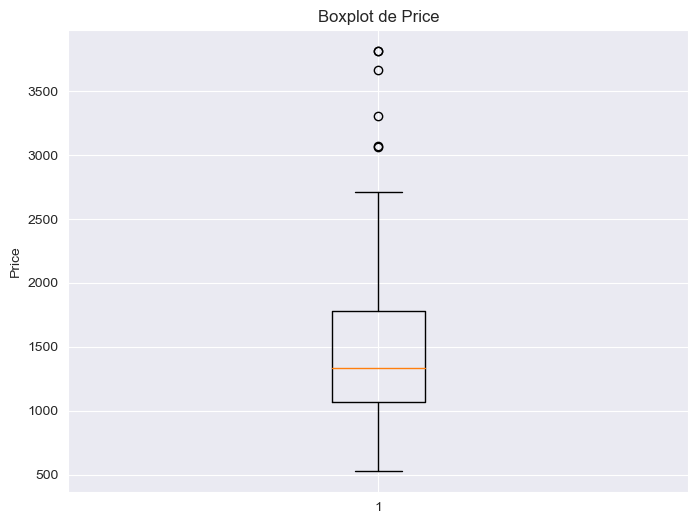

In [2]:
# exemplo
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Price')
plt.show()

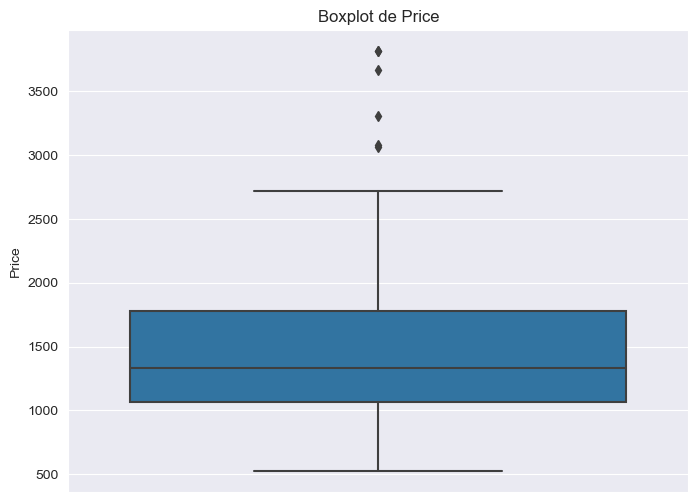

In [3]:
# exemplo com seaborn
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Price'])
plt.title('Boxplot de Price')
plt.ylabel('Price')
plt.show()

Podemos querer comparar a relacao entre duas variaveis. Para isso, podemos utilizar um __scatter plot__.

### Agrupando dados
Podemos aplicar o metodo "groupby()" para agrupar variaveis categoricas. Podemos agrupar por variavel unica, ou por multiplas variaveis.

Tambem podemos usar o metodo "pivot()" para apresentar uma variavel nas colunas, e outra nas linhas.

### Mapa de calor
Podemos plotar um heatmap para verificar algumas possiveis correlacoes entre as variaveis.

### Correlacao
Eh uma forma de verificarmos a relacao das variaveis.

(0.0, 3974.15)

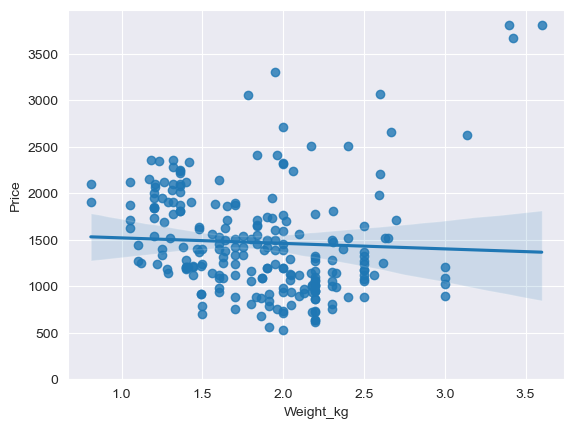

In [4]:
# Vamos a um exemplo de correlacao
sns.regplot(x='Weight_kg', y='Price', data=df)
plt.ylim(0,)

### Correlacao de Pearson
Mede a correlacao entre duas variaveis. Para isso, ela fornece o __coeficiente de correlacao__ e o __p_valor__.

Para interpretar o _coeficiente de correlacao_:
- Valor proximo de -1 ou 1: indica uma forte correlacao
- Valor proximo de 0: Indica uma correlacao baixa

Com relacao ao _p_valor_:
- Um p_valor < 0.001 indica forte certeza do resultado
- Um p_valor < 0.05 indica uma certeza moderada do resultado

In [5]:
# Exemplo da correlacao de pearson
pearson_coef, p_value = stats.pearsonr(df['Price'], df['GPU'])
print(pearson_coef.round(4))
print(p_value.round(4))

0.2883
0.0


In [16]:
# Correlacao para tres variaveis
for p in ['CPU_frequency', 'Screen_Size_cm', 'Weight_kg']:
    print(f'Correlation of Price and {p} is ', df[[p,"Price"]].corr().round(3))

Correlation of Price and CPU_frequency is                 CPU_frequency  Price
CPU_frequency          1.000  0.367
Price                  0.367  1.000
Correlation of Price and Screen_Size_cm is                  Screen_Size_cm  Price
Screen_Size_cm           1.000 -0.128
Price                   -0.128  1.000
Correlation of Price and Weight_kg is             Weight_kg  Price
Weight_kg      1.000 -0.051
Price         -0.051  1.000


In [12]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


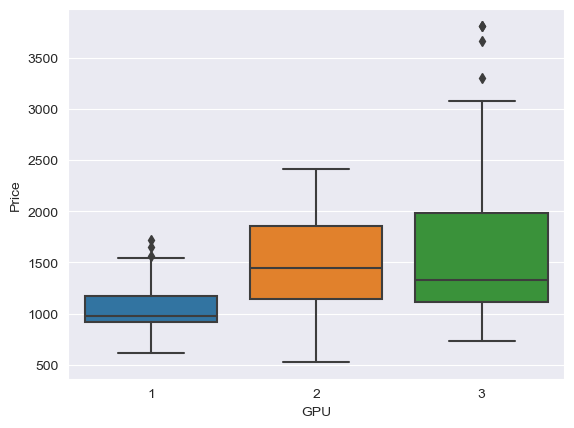

In [6]:
# Box plot GPU x Price
sns.boxplot(x='GPU', y='Price', data=df);

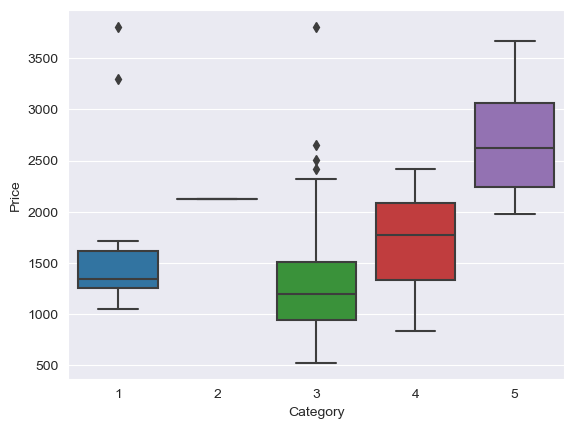

In [17]:
# Box plot Category x Price
sns.boxplot(x='Category', y='Price', data=df);

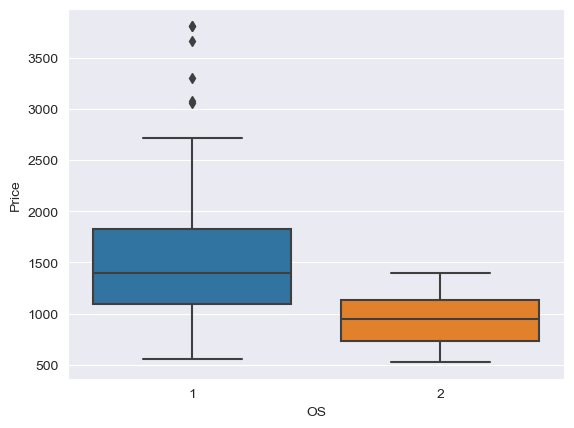

In [18]:
# OS Box plot
sns.boxplot(x='OS', y='Price', data=df);

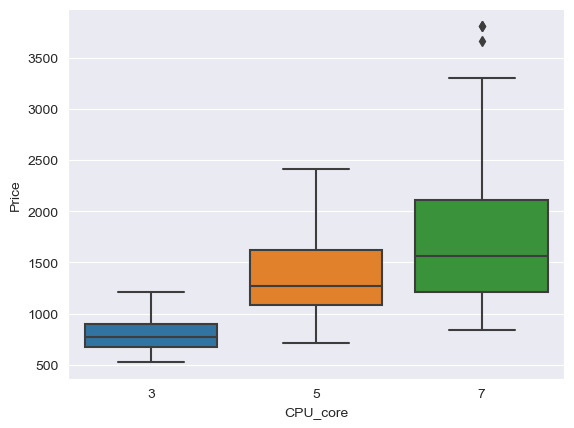

In [20]:
# CPU_core Box plot
sns.boxplot(x='CPU_core', y='Price', data=df);

In [7]:
# Contagem de valores
df['GPU'].value_counts()

GPU
2    136
3     69
1     33
Name: count, dtype: int64

In [8]:
# Transformar em DF
df['GPU'].value_counts().to_frame()

,count
GPU,
2,136
3,69
1,33


In [21]:
# Agrupar "GPU", "CPU_core" e "Price" para criar uma pivot table e visualizar a correlacao com Mapa de calor.
df_gptest = df[['GPU', 'CPU_core', 'Price']]
group = df_gptest.groupby(['GPU', 'CPU_core'], as_index=False).mean()
print(group)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [22]:
group_pivot = group.pivot(index="GPU", columns="CPU_core")
print(group_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


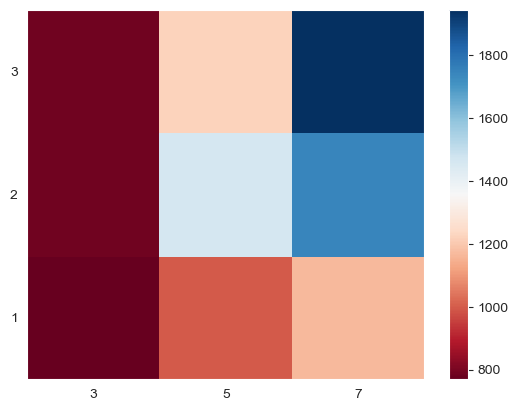

In [29]:
import numpy as np

fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

# Nomear os rotulos
r_labels = group_pivot.columns.levels[1]
c_labels = group_pivot.index

# Mover os ticks
ax.set_xticks(np.arange(group_pivot.shape[1]) + .5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + .5, minor=False)

# Inserir as Labels
ax.set_xticklabels(r_labels, minor=False)
ax.set_yticklabels(c_labels, minor=False)

fig.colorbar(im, ax=ax);

In [31]:
for p in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_cm','Weight_kg','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[p], df['Price'])
    print(p)
    print("Coeficiente de corelacao de Pearson para ", p, "eh ", pearson_coef, " com um P-valor de ", p_value)

RAM_GB
Coeficiente de corelacao de Pearson para  RAM_GB eh  0.5492972971857845  com um P-valor de  3.681560628842711e-20
CPU_frequency
Coeficiente de corelacao de Pearson para  CPU_frequency eh  0.36666555892588626  com um P-valor de  5.502463350713296e-09
Storage_GB_SSD
Coeficiente de corelacao de Pearson para  Storage_GB_SSD eh  0.2434207552181029  com um P-valor de  0.00014898923191724174


ValueError: array must not contain infs or NaNs